In [144]:
import numpy as np

M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])


# 1.Dataset visualization:

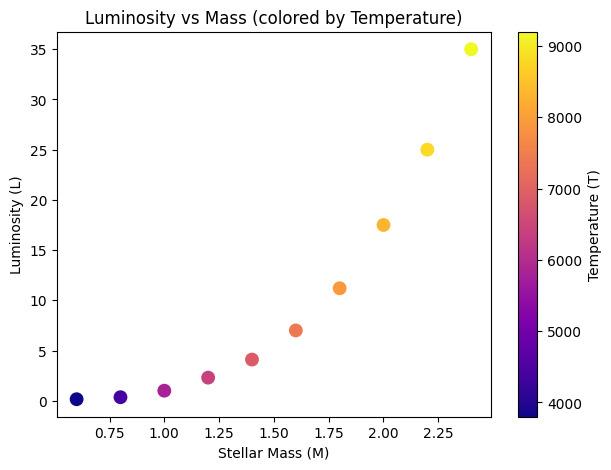

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sc = plt.scatter(M, L, c=T, cmap="plasma", s=80)
plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Luminosity vs Mass (colored by Temperature)")
cbar = plt.colorbar(sc)
cbar.set_label("Temperature (T)")
plt.show()


# 2.Feature engineering:

In [146]:
X = np.column_stack((M, T, M**2, M * T))
print(X)
print("X shape:", X.shape)

[[6.000e-01 3.800e+03 3.600e-01 2.280e+03]
 [8.000e-01 4.400e+03 6.400e-01 3.520e+03]
 [1.000e+00 5.800e+03 1.000e+00 5.800e+03]
 [1.200e+00 6.400e+03 1.440e+00 7.680e+03]
 [1.400e+00 6.900e+03 1.960e+00 9.660e+03]
 [1.600e+00 7.400e+03 2.560e+00 1.184e+04]
 [1.800e+00 7.900e+03 3.240e+00 1.422e+04]
 [2.000e+00 8.300e+03 4.000e+00 1.660e+04]
 [2.200e+00 8.800e+03 4.840e+00 1.936e+04]
 [2.400e+00 9.200e+03 5.760e+00 2.208e+04]]
X shape: (10, 4)


# 3.Loss and gradients (vectorized):

In [147]:

def predict(X, w, b):
    """Compute predictions f_{w,b}(x) for all examples.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix: each row is x^(i).
    w : np.ndarray, shape (n,)
        Parameter vector.
    b : float
        Bias term.

    Returns
    -------
    y_hat : np.ndarray, shape (m,)
        Vector of predictions for each example.
    """
    return X @ w + b  # vectorized: matrix-vector product + scalar

In [148]:
def compute_cost(X, L, w, b):
    """Compute the cost J(w,b) for linear regression with multiple features.

    Uses the vectorized formula:
        J = (1 / (2m)) * (y_hat - y)^T (y_hat - y)

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w : np.ndarray, shape (n,)
    b : float

    Returns
    -------
    cost : float
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - L
    cost = (error @ error) / (2 * m)
    return cost

# Test with w = 0, b = 0
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, L, w_test, b_test))

Cost with w=0, b=0: 117.69675


In [149]:
def compute_gradient(X, L, w, b):
    """Compute the gradients of J with respect to w and b.

    Vectorized formulas:
        dj_dw = (1/m) * X^T (y_hat - y)
        dj_db = (1/m) * sum(y_hat - y)
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - L

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, L, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)

Gradient at w=0, b=0:
dj_dw: [-2.152300e+01 -8.784500e+04 -4.594340e+01 -1.854088e+05]
dj_db: -10.36


# 4. Gradient descent + convergence:

In [150]:
def gradient_descent(X, L, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w_init : np.ndarray, shape (n,)
    b_init : float
    alpha : float
        Learning rate.
    num_iterations : int

    Returns
    -------
    w : np.ndarray, shape (n,)
    b : float
    history_it : list of int
    history_cost : list of float
    """
    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, L, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost

alpha = 1e-10
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: cost = 113.5327
Iteration   10: cost =  80.4962
Iteration   20: cost =  59.1036
Iteration   30: cost =  45.2389
Iteration   40: cost =  36.2410
Iteration   50: cost =  30.3897
Iteration   60: cost =  26.5729
Iteration   70: cost =  24.0715
Iteration   80: cost =  22.4207
Iteration   90: cost =  21.3201
Iteration  100: cost =  20.5753
Iteration  110: cost =  20.0608
Iteration  120: cost =  19.6953
Iteration  130: cost =  19.4264
Iteration  140: cost =  19.2202
Iteration  150: cost =  19.0546
Iteration  160: cost =  18.9155
Iteration  170: cost =  18.7938
Iteration  180: cost =  18.6834
Iteration  190: cost =  18.5806
Iteration  200: cost =  18.4829
Iteration  210: cost =  18.3886
Iteration  220: cost =  18.2968
Iteration  230: cost =  18.2068
Iteration  240: cost =  18.1180
Iteration  250: cost =  18.0304
Iteration  260: cost =  17.9435
Iteration  270: cost =  17.8575
Iteration  280: cost =  17.7720
Iteration  290: cost =  17.6872
Iteration  300: cost =  17.6030
Iteratio

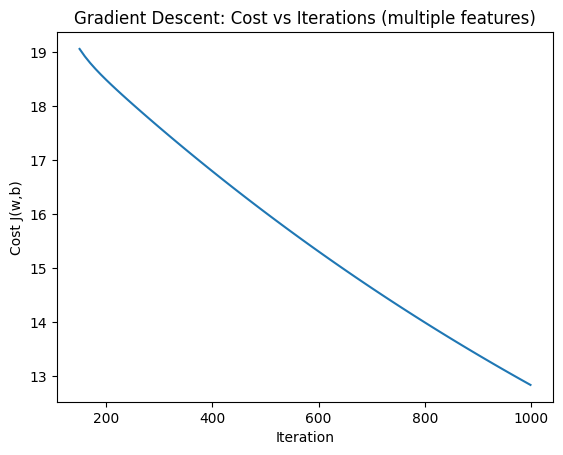

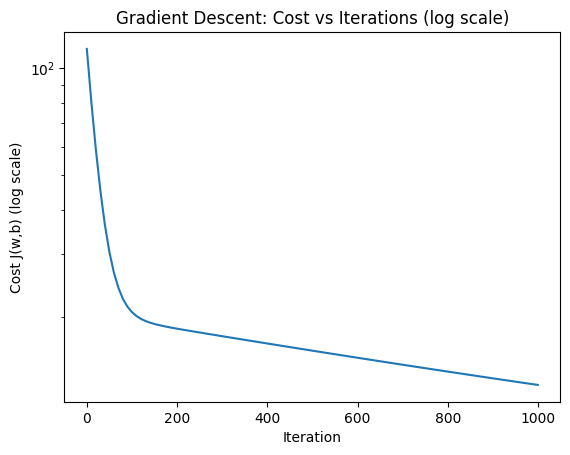

In [151]:
plt.figure()
plt.plot(it_hist[15:], cost_hist[15:])
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations (multiple features)")
plt.show()

plt.figure()
plt.semilogy(it_hist, cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b) (log scale)")
plt.title("Gradient Descent: Cost vs Iterations (log scale)")
plt.show()

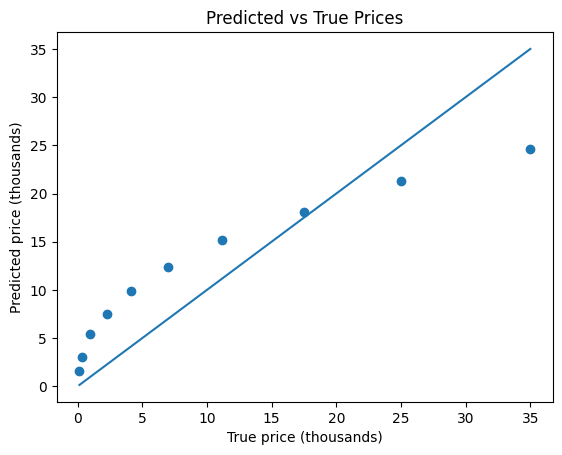

In [152]:
y_pred = predict(X, w_learned, b_learned)

plt.figure()
plt.scatter(L, y_pred)
plt.xlabel("True price (thousands)")
plt.ylabel("Predicted price (thousands)")
plt.title("Predicted vs True Prices")
plt.plot([L.min(), L.max()], [L.min(), L.max()])  # diagonal line
plt.show()

# 5.Feature selection experiment (mandatory):
## M1: X = [M,T]

In [153]:
X_M1 = np.column_stack((M, T))
print("X_M1:")
print(X_M1)
print("Shape:", X_M1.shape)

X_M1:
[[6.0e-01 3.8e+03]
 [8.0e-01 4.4e+03]
 [1.0e+00 5.8e+03]
 [1.2e+00 6.4e+03]
 [1.4e+00 6.9e+03]
 [1.6e+00 7.4e+03]
 [1.8e+00 7.9e+03]
 [2.0e+00 8.3e+03]
 [2.2e+00 8.8e+03]
 [2.4e+00 9.2e+03]]
Shape: (10, 2)


In [154]:
def predict_m1(X_M1, w, b):
    """Compute predictions f_{w,b}(x) for all examples.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix: each row is x^(i).
    w : np.ndarray, shape (n,)
        Parameter vector.
    b : float
        Bias term.

    Returns
    -------
    y_hat : np.ndarray, shape (m,)
        Vector of predictions for each example.
    """
    return X_M1 @ w + b  # vectorized: matrix-ve

In [155]:
def compute_cost_m1(X_M1, L, w, b):
    """Compute the cost J(w,b) for linear regression with multiple features.

    Uses the vectorized formula:
        J = (1 / (2m)) * (y_hat - y)^T (y_hat - y)

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w : np.ndarray, shape (n,)
    b : float

    Returns
    -------
    cost : float
    """
    m = X_M1.shape[0]
    y_hat = predict_m1(X_M1, w, b)
    error = y_hat - L
    cost = (error @ error) / (2 * m)
    return cost

# Test with w = 0, b = 0
n_M1 = X_M1.shape[1]
w_test_m1 = np.zeros(n_M1)
b_test_m1 = 0.0
print("Cost with w=0, b=0:", compute_cost_m1(X_M1, L, w_test_m1, b_test_m1))

Cost with w=0, b=0: 117.69675


In [156]:
def compute_gradient_m1(X_M1, L, w, b):
    """Compute the gradients of J with respect to w and b.

    Vectorized formulas:
        dj_dw = (1/m) * X^T (y_hat - y)
        dj_db = (1/m) * sum(y_hat - y)
    """
    m1 = X_M1.shape[0]
    y_hat_m1 = predict_m1(X_M1, w, b)
    error_m1 = y_hat_m1 - L

    dj_dw_m1 = (X_M1.T @ error_m1) / m1
    dj_db_m1 = np.sum(error_m1) / m1
    return dj_dw_m1, dj_db_m1

dj_dw_test_m1, dj_db_test_m1 = compute_gradient_m1(X_M1, L, w_test_m1, b_test_m1)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test_m1)
print("dj_db:", dj_db_test_m1)

Gradient at w=0, b=0:
dj_dw: [-2.1523e+01 -8.7845e+04]
dj_db: -10.36


In [157]:
def gradient_descent_m1(X_M1, L, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w_init : np.ndarray, shape (n,)
    b_init : float
    alpha : float
        Learning rate.
    num_iterations : int

    Returns
    -------
    w : np.ndarray, shape (n,)
    b : float
    history_it : list of int
    history_cost : list of float
    """
    w_m1 = w_init.copy()
    b_m1 = b_init
    history_it_m1 = []
    history_cost_m1 = []

    for i in range(num_iterations):
        dj_dw_m1, dj_db_m1 = compute_gradient_m1(X_M1, L, w_m1, b_m1)
        w_m1 = w_m1 - alpha * dj_dw_m1
        b_m1 = b_m1 - alpha * dj_db_m1

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost_m1(X_M1, L, w_m1, b_m1)
            history_it_m1.append(i)
            history_cost_m1.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w_m1, b_m1, history_it_m1, history_cost_m1

alpha = 1e-10
num_iterations = 1000
w_init_m1 = np.zeros(n_M1)
b_init_m1 = 0.0

w_learned_m1, b_learned_m1, it_hist_m1, cost_hist_m1 = gradient_descent_m1(X_M1, L, w_init_m1, b_init_m1, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned_m1)
print("b =", b_learned_m1)

Iteration    0: cost = 116.9270
Iteration   10: cost = 109.6429
Iteration   20: cost = 103.0591
Iteration   30: cost =  97.1084
Iteration   40: cost =  91.7297
Iteration   50: cost =  86.8682
Iteration   60: cost =  82.4741
Iteration   70: cost =  78.5024
Iteration   80: cost =  74.9126
Iteration   90: cost =  71.6679
Iteration  100: cost =  68.7352
Iteration  110: cost =  66.0845
Iteration  120: cost =  63.6886
Iteration  130: cost =  61.5230
Iteration  140: cost =  59.5657
Iteration  150: cost =  57.7965
Iteration  160: cost =  56.1975
Iteration  170: cost =  54.7521
Iteration  180: cost =  53.4458
Iteration  190: cost =  52.2650
Iteration  200: cost =  51.1978
Iteration  210: cost =  50.2331
Iteration  220: cost =  49.3612
Iteration  230: cost =  48.5732
Iteration  240: cost =  47.8609
Iteration  250: cost =  47.2171
Iteration  260: cost =  46.6351
Iteration  270: cost =  46.1092
Iteration  280: cost =  45.6338
Iteration  290: cost =  45.2041
Iteration  300: cost =  44.8157
Iteratio

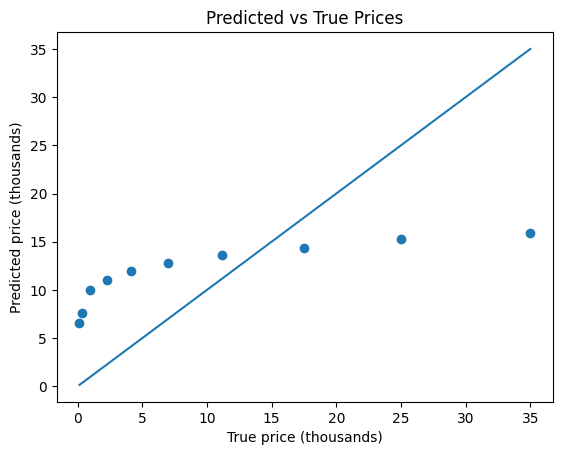

In [158]:
y_pred_m1 = predict_m1(X_M1, w_learned_m1, b_learned_m1)

plt.figure()
plt.scatter(L, y_pred_m1)
plt.xlabel("True price (thousands)")
plt.ylabel("Predicted price (thousands)")
plt.title("Predicted vs True Prices")
plt.plot([L.min(), L.max()], [L.min(), L.max()])  # diagonal line
plt.show()

## M2: X = [M,T,M^2]

In [159]:
X_M2 = np.column_stack((M, T, M**2))
print("X_M2:")
print(X_M2)
print("Shape:", X_M2.shape)


X_M2:
[[6.00e-01 3.80e+03 3.60e-01]
 [8.00e-01 4.40e+03 6.40e-01]
 [1.00e+00 5.80e+03 1.00e+00]
 [1.20e+00 6.40e+03 1.44e+00]
 [1.40e+00 6.90e+03 1.96e+00]
 [1.60e+00 7.40e+03 2.56e+00]
 [1.80e+00 7.90e+03 3.24e+00]
 [2.00e+00 8.30e+03 4.00e+00]
 [2.20e+00 8.80e+03 4.84e+00]
 [2.40e+00 9.20e+03 5.76e+00]]
Shape: (10, 3)


In [160]:
def predict_m2(X_M2, w, b):
    """Compute predictions f_{w,b}(x) for all examples.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix: each row is x^(i).
    w : np.ndarray, shape (n,)
        Parameter vector.
    b : float
        Bias term.

    Returns
    -------
    y_hat : np.ndarray, shape (m,)
        Vector of predictions for each example.
    """
    return X_M2 @ w + b  # vectorized: matrix-ve

In [161]:
def compute_cost_m2(X_M2, L, w, b):
    """Compute the cost J(w,b) for linear regression with multiple features.

    Uses the vectorized formula:
        J = (1 / (2m)) * (y_hat - y)^T (y_hat - y)

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w : np.ndarray, shape (n,)
    b : float

    Returns
    -------
    cost : float
    """
    m2 = X_M2.shape[0]
    y_hat_m2 = predict_m2(X_M2, w, b)
    error_m2 = y_hat_m2 - L
    cost_m2 = (error_m2 @ error_m2) / (2 * m2)
    return cost_m2

# Test with w = 0, b = 0
n_M2 = X_M2.shape[1]
w_test_m2 = np.zeros(n_M2)
b_test_m2 = 0.0
print("Cost with w=0, b=0:", compute_cost_m2(X_M2, L, w_test_m2, b_test_m2))

Cost with w=0, b=0: 117.69675


In [162]:
def compute_gradient_m2(X_M2, L, w, b):
    """Compute the gradients of J with respect to w and b.

    Vectorized formulas:
        dj_dw = (1/m) * X^T (y_hat - y)
        dj_db = (1/m) * sum(y_hat - y)
    """
    m = X_M2.shape[0]
    y_hat_m2 = predict_m2(X_M2, w, b)
    error = y_hat_m2 - L

    dj_dw = (X_M2.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient_m2(X_M2, L, w_test_m2, b_test_m2)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)

Gradient at w=0, b=0:
dj_dw: [-2.15230e+01 -8.78450e+04 -4.59434e+01]
dj_db: -10.36


In [163]:
def gradient_descent_m2(X_M2, L, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w_init : np.ndarray, shape (n,)
    b_init : float
    alpha : float
        Learning rate.
    num_iterations : int

    Returns
    -------
    w : np.ndarray, shape (n,)
    b : float
    history_it : list of int
    history_cost : list of float
    """
    w_m2 = w_init.copy()
    b_m2 = b_init
    history_it_m2 = []
    history_cost_m2 = []

    for i in range(num_iterations):
        dj_dw_m2, dj_db_m2 = compute_gradient_m2(X_M2, L, w_m2, b_m2)
        w_m2 = w_m2 - alpha * dj_dw_m2
        b_m2 = b_m2 - alpha * dj_db_m2

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost_m2(X_M2, L, w_m2, b_m2)
            history_it_m2.append(i)
            history_cost_m2.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w_m2, b_m2, history_it_m2, history_cost_m2

alpha = 1e-10
num_iterations = 1000
w_init_m2 = np.zeros(n_M2)
b_init_m2 = 0.0

w_learned_m2, b_learned_m2, it_hist_m2, cost_hist_m2 = gradient_descent_m2(X_M2, L, w_init_m2, b_init_m2, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned_m2)
print("b =", b_learned_m2)

Iteration    0: cost = 116.9270
Iteration   10: cost = 109.6429
Iteration   20: cost = 103.0591
Iteration   30: cost =  97.1084
Iteration   40: cost =  91.7297
Iteration   50: cost =  86.8682
Iteration   60: cost =  82.4740
Iteration   70: cost =  78.5024
Iteration   80: cost =  74.9126
Iteration   90: cost =  71.6679
Iteration  100: cost =  68.7352
Iteration  110: cost =  66.0844
Iteration  120: cost =  63.6886
Iteration  130: cost =  61.5230
Iteration  140: cost =  59.5657
Iteration  150: cost =  57.7965
Iteration  160: cost =  56.1974
Iteration  170: cost =  54.7521
Iteration  180: cost =  53.4458
Iteration  190: cost =  52.2650
Iteration  200: cost =  51.1977
Iteration  210: cost =  50.2331
Iteration  220: cost =  49.3612
Iteration  230: cost =  48.5732
Iteration  240: cost =  47.8609
Iteration  250: cost =  47.2171
Iteration  260: cost =  46.6351
Iteration  270: cost =  46.1092
Iteration  280: cost =  45.6338
Iteration  290: cost =  45.2041
Iteration  300: cost =  44.8157
Iteratio

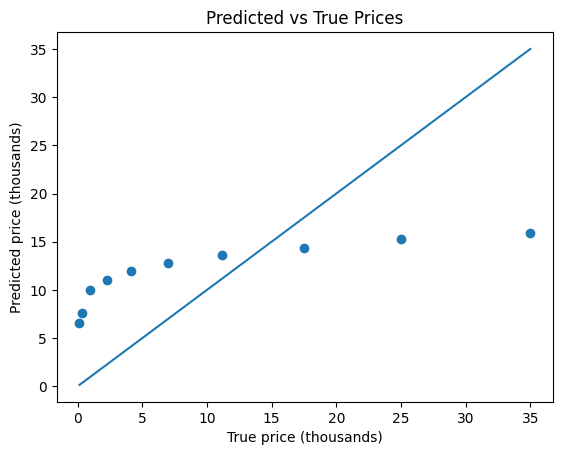

In [164]:
y_pred_m2 = predict_m1(X_M2, w_learned_m2, b_learned_m2)

plt.figure()
plt.scatter(L, y_pred_m2)
plt.xlabel("True price (thousands)")
plt.ylabel("Predicted price (thousands)")
plt.title("Predicted vs True Prices")
plt.plot([L.min(), L.max()], [L.min(), L.max()])  # diagonal line

# Results:

In [165]:
print("Cost X   :", compute_cost(X, L, np.zeros(X.shape[1]), 0.0))
print("Cost M1  :", compute_cost_m1(X_M1, L, np.zeros(X_M1.shape[1]), 0.0))
print("Cost M2  :", compute_cost_m2(X_M2, L, np.zeros(X_M2.shape[1]), 0.0))


Cost X   : 117.69675
Cost M1  : 117.69675
Cost M2  : 117.69675


In [166]:
print("Grad X :", compute_gradient(X, L, np.zeros(X.shape[1]), 0.0)[0])
print("Grad M1:", compute_gradient_m1(X_M1, L, np.zeros(X_M1.shape[1]), 0.0)[0])
print("Grad M2:", compute_gradient_m2(X_M2, L, np.zeros(X_M2.shape[1]), 0.0)[0])


Grad X : [-2.152300e+01 -8.784500e+04 -4.594340e+01 -1.854088e+05]
Grad M1: [-2.1523e+01 -8.7845e+04]
Grad M2: [-2.15230e+01 -8.78450e+04 -4.59434e+01]


In [167]:
print("Final cost X :", cost_hist[-1])
print("Final cost M1:", cost_hist_m1[-1])
print("Final cost M2:", cost_hist_m2[-1])


Final cost X : 12.832139732450987
Final cost M1: 41.16764356296715
Final cost M2: 41.167626325708284


In [170]:
print("Learned parameters:")
print("Model X : w =", w_learned,     " b =", b_learned)
print("Model M1: w =", w_learned_m1,  " b =", b_learned_m1)
print("Model M2: w =", w_learned_m2,  " b =", b_learned_m2)


Learned parameters:
Model X : w = [ 3.46107916e-08 -3.14590767e-04  4.61242246e-07  1.24571312e-03]  b = -1.2764515661132606e-07
Model M1: w = [5.70842517e-07 1.73131715e-03]  b = 7.207200653288327e-08
Model M2: w = [5.70842354e-07 1.73131654e-03 1.71167726e-06]  b = 7.207194859272399e-08
